# Implicit reparametrization trick: demonstration

Hear we demonstrate usage of library **torch.distributions.implicit** that we implemented within group of four students at MIPT.

### Introduction

The vanilla ELBO estimation in generative models like VAE uses reparametrization trick: a method of sampling random variables with low variance of the gradient of parameter distribution. However, this method is available only for the limited number of distributions. For instance, it cannot be applied to some important continuous standard distributions such as Dirichlet, Beta, Gamma and mixture of distributions.

The implicit reparameterization trick (IRT), being a modification of standart reparametrization trick, is much more expressive and applicable to a wider class of distributions. For a demonstration of its application in VAE, see [vae_experiment.ipynb](https://github.com/intsystems/implicit-reparameterization-trick/blob/main/code/vae_experiment.ipynb).

Let's define the problem more precisely. Suppose we would like to optimize the expectation $\mathbb{E}_{q_{\phi}(z)}[f(z)]$ of some function $f(z)$ w.r.t. the parameters $\phi$ of the distribution. We will assume that there exists special standardization function $S_{\phi}(z)$ that eliminates dependence on the distribution's parameters:

$$
S_{\phi}(z)=\varepsilon \sim  q(\varepsilon),\quad z = S_{\phi}^{-1}(\varepsilon).
$$

The table below outlines the optimization scheme when applying different reparameterization techniques to solve an optimization problem.

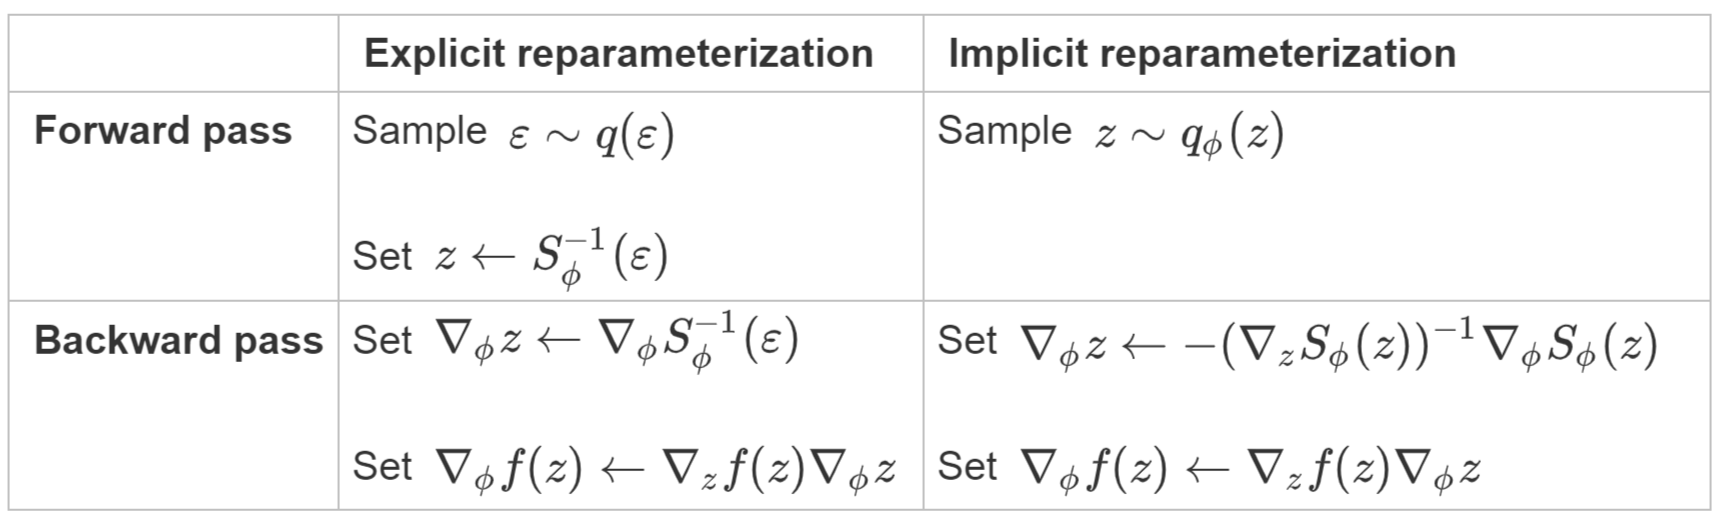

For more mathematical details, please refer to the [blog post](https://habr.com/ru/articles/860686/) for a comprehensive description of these two reparameterization trick methods.

### Installation

To install IRT library use the following command:

```
!git clone https://github.com/intsystems/implicit-reparameterization-trick.git
!pip install implicit-reparameterization-trick/src
```

### Scope

We implemented several distributions with reparametrized sampling ability using implicit reparametrisation trick:

- Gaussian normal distribution

- Dirichlet distribution (Beta distrbutioin)

- Gamma distrbutioin

- Mixture of distributions

- Student-t distrbutioin


### Usage example

Here is an example of sampling from the [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) distribution:

In [63]:
# Import standard libraries
import sys
import os
import torch
from torch import nn

In [64]:
# Import IRT library
!git clone https://github.com/intsystems/implicit-reparameterization-trick.git
!pip install implicit-reparameterization-trick/src

fatal: destination path 'implicit-reparameterization-trick' already exists and is not an empty directory.
Processing ./implicit-reparameterization-trick/src
  Preparing metadata (setup.py) ... done
  Created wheel for irt: filename=irt-0.0.1-py3-none-any.whl size=8045 sha256=157a18dcbfe5fa3c389497575c660350cc60cd2e66108d385844a8cc104cf308
  Stored in directory: /tmp/pip-ephem-wheel-cache-07cz0fkb/wheels/ba/1a/17/61d086780df8ffccaf66dc930d4af3090f18898673bd63f4ca
Successfully built irt
  Attempting uninstall: irt
    Found existing installation: irt 0.0.1
    Uninstalling irt-0.0.1:
      Successfully uninstalled irt-0.0.1


tensor([0.1060, 0.3866]) tensor([-0.0333, -0.2790])


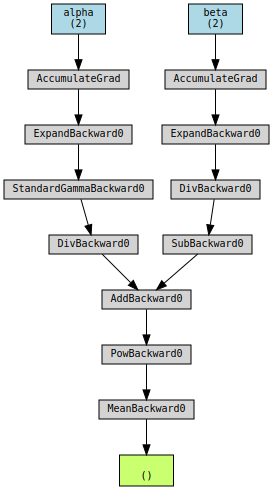

In [65]:
# Define parameters for distribution
alpha, beta = torch.tensor([1.0, 2.0], requires_grad=True), torch.tensor([2.0, 3.0], requires_grad=True)
# Define Gamma distribution from IRT library
z = irt.Gamma(alpha, beta).rsample()
# Calculate loss
loss = torch.mean(z ** 2)
# Backpropogate loss through distribution
loss.backward()

print(alpha.grad, beta.grad)
torchviz.make_dot(loss,  params = {'alpha': alpha, 'beta': beta})

Below is a demonstration of using [Beta](https://en.wikipedia.org/wiki/Beta_distribution) distribution to train a simple stochastic model:

In [61]:
# Define simple encoder for model
class SimpleEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        super(SimpleEncoder, self).__init__()
        self.fc = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        return self.fc(x)

# Define simple decoder for model
class SimpleDecoder(nn.Module):
    def __init__(self, hidden_dim, output_dim):
        super().__init__()
        super(SimpleDecoder, self).__init__()
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

# Define simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = SimpleEncoder(20, 10)
        self.decoder = SimpleEncoder(5, 20)

    def forward(self, x):
        x = nn.functional.softmax(self.encoder(x), dim=0)
        alpha, beta = x.chunk(2, dim=0)
        y = irt.Beta(alpha, beta).rsample()
        y = self.decoder(y)
        return y

In [62]:
model = SimpleModel()
x = torch.randn(20)
y = model(x)
loss = y.mean()
loss.backward()

### Development

If you want to use the code of the IRT library in your project, it is essential to ensure that your implementation successfully passes all the necessary [tests](https://github.com/intsystems/implicit-reparameterization-trick/blob/main/code/run_unittest.py).  

### Documentation



For comprehensive information and guidance regarding the features and functionalities of IRT library, you can find the full documentation by following this [link](https://intsystems.github.io/implicit-reparameterization-trick/).